In [1]:
import numpy as np

numbers = np.arange(1, 9)

samples = np.random.choice(numbers, size=10000, replace=True)



In [10]:
numbers = np.arange(0, 10)

In [5]:
sum = 0
for i in numbers:
    sum += np.sum(samples==i)
    print(np.sum(samples==i))
print(sum)

1198
1255
1250
1234
1203
1295
1281
1284
10000


In [11]:
import numpy as np

mean = 4.5  
std_dev = 1.5 

samples = np.random.normal(loc=mean, scale=std_dev, size=10000)

samples = np.round(samples)


In [12]:

samples = np.clip(samples, 1, 8)

print(samples[:10])

[5. 3. 5. 2. 5. 6. 3. 3. 5. 7.]


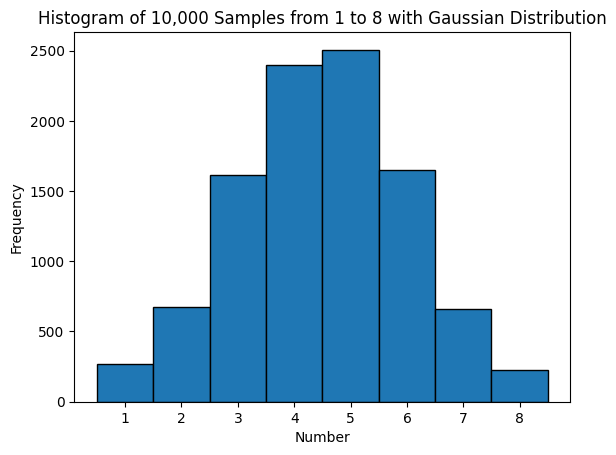

In [9]:
import matplotlib.pyplot as plt

# Plot the histogram of the samples
plt.hist(samples, bins=np.arange(1, 10)-0.5, edgecolor='black')
plt.xticks(range(1, 9))
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Histogram of 10,000 Samples from 1 to 8 with Gaussian Distribution')
plt.show()


In [5]:
import numpy as np
import pandas as pd

num_rows = 1000000

categories = np.arange(0, 1000)
feature1 = np.random.choice(categories, num_rows, replace=True)
feature2 = np.random.choice(categories, num_rows, replace=True)
feature3 = np.random.choice(categories, num_rows, replace=True)

ground = np.random.randint(0, 500, num_rows)

data = {'feature1': feature1, 'feature2': feature2, 'feature3': feature3}
df = pd.DataFrame(data)
df

,feature1,feature2,feature3
0,229,659,172
1,868,349,206
2,989,563,254
3,434,783,654
4,416,805,476
...,...,...,...
999995,546,689,384
999996,96,82,2
999997,569,570,21
999998,670,226,370


In [6]:
def create_contingency_matrix2(ground_true, predicted, ground_true_unique, predicted_unique):
    contingency_matrix = np.zeros((len(ground_true_unique), len(predicted_unique)), dtype=int)
    ground_true_map = {label: i for i, label in enumerate(ground_true_unique)}
    predicted_map = {label: j for j, label in enumerate(predicted_unique)}
    for i in range(len(ground_true)):
        contingency_matrix[ground_true_map[ground_true[i]], predicted_map[predicted[i]]] += 1
    return contingency_matrix

def create_contingency_matrix(ground_true, predicted, ground_true_unique, predicted_unique):
    contingency_matrix = np.zeros((len(ground_true_unique), len(predicted_unique)), dtype=int)
    for i, label1 in enumerate(ground_true_unique):
      for j, label2 in enumerate(predicted_unique):
        contingency_matrix[i, j] = np.sum((ground_true == label1) & (predicted == label2))
    return contingency_matrix

In [7]:
def uniform_distribution_data_generator(number_of_communities, number_of_data_rows):

    numbers = np.arange(1, number_of_communities+1)
    samples = np.random.choice(numbers, size=number_of_data_rows, replace=True)
    return samples

In [16]:
balance1 = uniform_distribution_data_generator(500, 100000)
balance2 = uniform_distribution_data_generator(500, 100000)

balance1_unique = np.unique(balance1)
balance2_unique = np.unique(balance2)  


In [17]:
contingency_matrix = create_contingency_matrix(balance1, balance2, balance1_unique, balance2_unique)

In [18]:
contingency_matrix2 = create_contingency_matrix2(balance1, balance2, balance1_unique, balance2_unique)

In [19]:
contingency_matrix == contingency_matrix2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])